In [1]:
import math
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

# Load Preprocessed Data
This is the training data preprocessed as explained in the individual report

In [2]:
df_train = pd.read_csv("encoded_train.csv")

In [3]:
df_train = df_train.drop("Unnamed: 0", axis=1)
df_train.head()

,click,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio
0,0,200,200,5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,40000,1.000000
1,0,300,250,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,75000,0.833333
2,0,250,250,5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,62500,1.000000
3,0,160,600,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,96000,3.750000
4,0,728,90,133,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65520,0.123626


## SAMPLING

In [91]:
df_train_clicked = df_train[df_train["click"] == 1]
df_train_noclick = df_train[df_train["click"] == 0]
df_train_noclick_sample = df_train_noclick.sample(frac=1, random_state=3)
df_train = pd.concat([df_train_clicked, df_train_noclick_sample])
df_train.head()

,click,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio
1104,1,1000,90,80,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90000,0.090000
4949,1,336,280,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94080,0.833333
8878,1,300,250,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,75000,0.833333
9790,1,320,50,160,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16000,0.156250
10000,1,300,250,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75000,0.833333


In [92]:
X = df_train.drop(["click"], axis=1)
y = df_train["click"]
X.tail()

,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio
2335478,960,90,50,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,86400,0.093750
855142,160,600,221,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,96000,3.750000
597937,336,280,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94080,0.833333
606647,300,250,20,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75000,0.833333
1621839,300,250,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75000,0.833333


## Training

In [93]:
# clf = linear_model.LogisticRegression()
# clf = ensemble.GradientBoostingClassifier()
clf = xgb.XGBClassifier(n_jobs=3)

In [94]:
clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=3, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

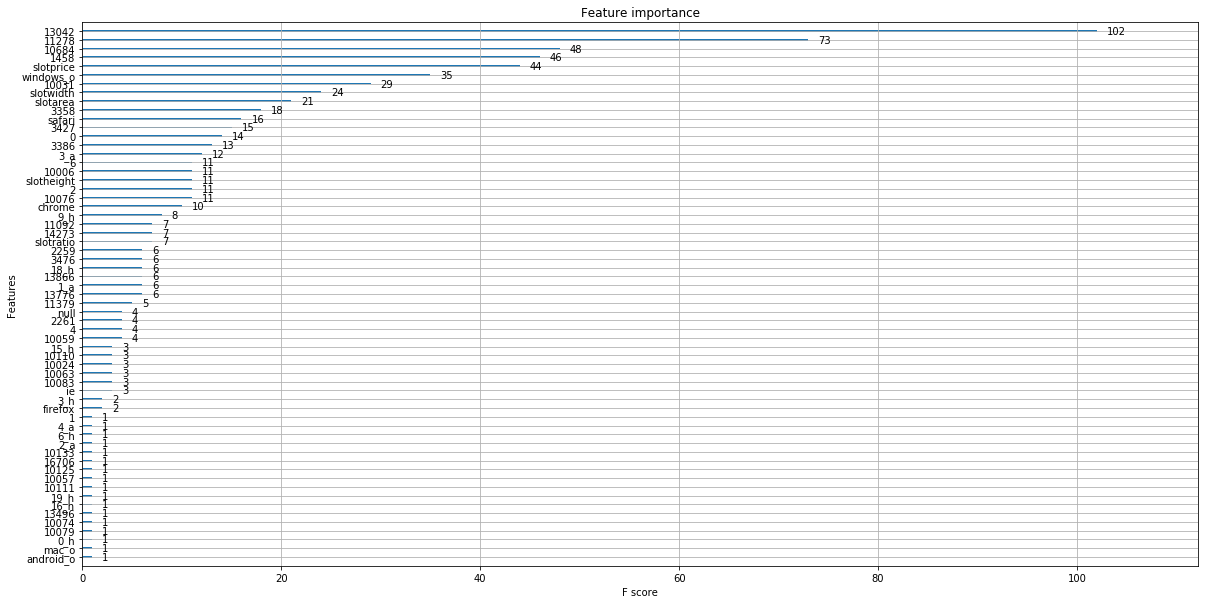

In [95]:
fig, ax = plt.subplots(figsize=(20,10)) 
xgb.plot_importance(clf,ax=ax)

# Testing with Validation Set

In [96]:
df_valid = pd.read_csv("validation.csv")
df_valid.head(10)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,null,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,trqRTu1YP5scFsf,cff326604db401e7d4f895fd747f7e91,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,trqRTv14MqTR1m58uG,93f242f025dc7d424c4ba7002b177df7,null,2996225656,300,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,trqRTvdJMoFoFoc4JKn,40c388f45dbc0e1fc53a8c6c81305de5,null,3481684581,336,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,tKFJeun0BouoXOl4JKTI,fcf53e0e5f09aa8d7e1c9d986cea321,null,1120607322,200,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3,5KKFB19rg5scFsf,cf5d45e408ea2b18576f42a4be3865a,null,Lady_Width3,960,90,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111"
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1,trqRTJjrXqf7FmMs,f3888d3e83f0c4f0b916af53191d8164,null,mm_13991432_2298120_9467354,336,280,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110"
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1,trqRTummPvas1m58uG,b639cdf96befe9ba75f8962e2c58d3bf,null,mm_10058411_2865562_9929053,300,250,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,null
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2,trqRTuSJBqMIXdd85SqfNX,eedd657004ccb6d9e3e471d456ed40c7,null,4056663416,336,280,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110"
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3,31xSTvprdN1RFt,575787118f246d690223fd5a3ffdc710,null,ALLINONE_F_Width2,1000,90,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111"


In [97]:
df_valid = df_valid.drop(["bidid","IP","userid","domain","url","urlid","slotid","slotformat",
             "slotvisibility","creative","bidprice","payprice","keypage","region","city"], axis=1)
df_valid['os'], df_valid['browser'] = df_valid['useragent'].str.split('_', 1).str
df_valid = df_valid.drop(["useragent"], axis=1)
df_ad = pd.get_dummies(df_valid['adexchange'])
df_ad.columns = [str(col) + '_a' for col in df_ad.columns]
df_hour = pd.get_dummies(df_valid['hour'])
df_hour.columns = [str(col) + '_h' for col in df_hour.columns]
df_os = pd.get_dummies(df_valid['os'])
df_os.columns = [str(col) + '_o' for col in df_os.columns]
df_tag = df_valid["usertag"].str.get_dummies(sep=",")
df_valid = pd.concat([df_valid, 
                      df_os,
                      pd.get_dummies(df_valid['browser']),
                      pd.get_dummies(df_valid['weekday']),
                      df_hour,
                     df_ad,
                     pd.get_dummies(df_valid['advertiser']),
                     df_tag], axis=1)
df_valid = df_valid.drop(["weekday","adexchange","advertiser","hour","os","browser","usertag"], axis=1)
df_valid["slotarea"] = df_valid["slotheight"] * df_valid["slotwidth"]
df_valid["slotratio"] = df_valid["slotheight"] / df_valid["slotwidth"]
df_valid = df_valid.replace('null',np.nan).dropna()

In [98]:
pd.DataFrame([X.columns, df_valid.columns[1:]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133
0,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio
1,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio


In [99]:
df_valid.head()

,click,slotwidth,slotheight,slotprice,android_o,ios_o,linux_o,mac_o,other_o,windows_o,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld,0,1,2,3,4,5,6,0_h,1_h,2_h,3_h,4_h,5_h,6_h,7_h,8_h,9_h,10_h,11_h,12_h,13_h,14_h,15_h,16_h,17_h,18_h,19_h,20_h,21_h,22_h,23_h,1_a,2_a,3_a,4_a,null_a,1458,2259,2261,2821,2997,3358,3386,3427,3476,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753,null,slotarea,slotratio
0,0,160,600,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,96000,3.750000
1,0,950,90,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85500,0.094737
2,0,300,250,5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,75000,0.833333
3,0,336,280,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,94080,0.833333
4,0,200,200,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,40000,1.000000


In [100]:
res = clf.predict_proba(df_valid.drop("click", axis=1))
res

array([[ 0.99289048,  0.00710953],
       [ 0.99404299,  0.005957  ],
       [ 0.99219054,  0.00780949],
       ..., 
       [ 0.978396  ,  0.021604  ],
       [ 0.98692364,  0.01307636],
       [ 0.9839865 ,  0.01601353]], dtype=float32)

In [101]:
res_df = pd.DataFrame(res)
res_df.head()

,0,1
0,0.992890,0.007110
1,0.994043,0.005957
2,0.992191,0.007809
3,0.992034,0.007966
4,0.996009,0.003991


In [102]:
res_df["pred"] = res_df[1].apply(lambda x: 1 if x > 0.01 else 0)
res_df[res_df["pred"] == 1].shape

(180742, 3)

In [103]:
metrics.confusion_matrix(df_valid["click"], res_df["pred"])

array([[123173, 180550],
       [    10,    192]], dtype=int64)

In [104]:
print(metrics.classification_report(df_valid["click"], res_df["pred"]))

             precision    recall  f1-score   support

          0       1.00      0.41      0.58    303723
          1       0.00      0.95      0.00       202

avg / total       1.00      0.41      0.58    303925



In [105]:
avg_ctr = res_df[1].mean()
avg_ctr

0.01770784705877304

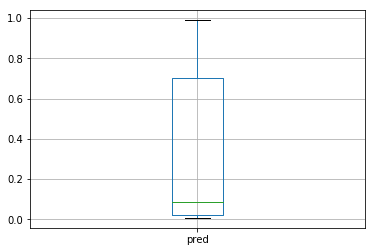

In [106]:
xdf = pd.DataFrame()
xdf["click"] = df_valid["click"]
xdf["pred"] = res_df[1]
xdf[xdf["click"] == 1].boxplot(column="pred")

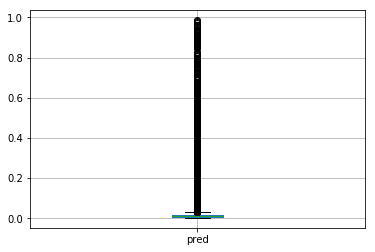

In [107]:
xdf[xdf["click"] == 0].boxplot(column="pred")

In [108]:
xdf[xdf["click"] == 1].median()

click    1.000000
pred     0.087096
dtype: float64

In [109]:
xdf[xdf["click"] == 0].median()

click    0.000000
pred     0.011365
dtype: float64

In [110]:
metrics.roc_auc_score(xdf["click"], xdf["pred"])

0.86892384974414716

In [111]:
metrics.mean_squared_error(xdf["click"], xdf["pred"])**(1/2)

0.040447952086576179

# BIDDING

In [125]:
base_bid = 86
df = pd.read_csv("validation.csv")
df.drop(["bidid","IP","userid","domain","url","urlid","slotid","slotformat",
             "slotvisibility","creative","bidprice","keypage","usertag"], axis=1)
df["newbid"] = res_df[1].apply(lambda x: base_bid*(x/avg_ctr))

df['win'] = (df['newbid'] >= df['payprice']).astype(int)
df['paid'] = df['win'] * df['payprice']
df['cum_paid'] = df['paid'].cumsum()
df = df[df['cum_paid'] <= 6250000]

wins = df["win"].astype(int).sum()
clicks = df[df["win"] == 1]["click"].astype(int).sum()
cost = df[(df["newbid"] >= df["payprice"])]["payprice"].sum()/1000
win_rate = wins / df.shape[0]
ctr = (clicks / wins)
cpm = (cost / wins)
cpc = (cost / clicks) if clicks > 0 else -1
bids_processed = df.shape[0]
new_row = [wins, clicks, cost, win_rate, ctr, cpm, cpc, bids_processed]
new_row

[146026,
 162,
 6240.346,
 0.48046722053138108,
 0.0011093914782299042,
 0.042734485639543643,
 38.520654320987653,
 303925]

# Generating Bid Values for Testing Set

In [126]:
df_test = pd.read_csv("test.csv")
df_test = df_test.drop(["bidid","IP","userid","domain","url","urlid","slotid","slotformat",
             "slotvisibility","creative","keypage","region","city"], axis=1)
df_test['os'], df_test['browser'] = df_test['useragent'].str.split('_', 1).str
df_test = df_test.drop(["useragent"], axis=1)
df_ad = pd.get_dummies(df_test['adexchange'])
df_ad.columns = [str(col) + '_a' for col in df_ad.columns]
df_hour = pd.get_dummies(df_test['hour'])
df_hour.columns = [str(col) + '_h' for col in df_hour.columns]
df_os = pd.get_dummies(df_test['os'])
df_os.columns = [str(col) + '_o' for col in df_os.columns]
df_tag = df_test["usertag"].str.get_dummies(sep=",")
df_test = pd.concat([df_test, 
                      df_os,
                      pd.get_dummies(df_test['browser']),
                      pd.get_dummies(df_test['weekday']),
                      df_hour,
                     df_ad,
                     pd.get_dummies(df_test['advertiser']),
                     df_tag], axis=1)
df_test = df_test.drop(["weekday","adexchange","advertiser","hour","os","browser","usertag"], axis=1)
df_test["slotarea"] = df_test["slotheight"] * df_test["slotwidth"]
df_test["slotratio"] = df_test["slotheight"] / df_test["slotwidth"]
df_test = df_test.replace('null',np.nan).dropna()

res = clf.predict_proba(df_test)
res_df = pd.DataFrame(res)
base_bid = 86
bids = res_df[1].apply(lambda x: base_bid*(x/avg_ctr))
df = pd.read_csv("test.csv")
df["bidprice"] = bids
df[["bidid","bidprice"]].head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,122.141215
1,29167d4caa719788b5a342dbaa25151d53121f80,416.952260
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,33.337492
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,74.458432
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,84.221838


In [128]:
df[["bidid","bidprice"]].to_csv("best.csv", index=False)